In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Collection

In [3]:
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
# Creating a list for categorical data
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [11]:
from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocessing

number = LabelEncoder()
for i in string_columns:
    salary_train[i]= number.fit_transform(salary_train[i])
    salary_test[i]=number.fit_transform(salary_test[i])

In [12]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [13]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


# Exploratory Data Analysis (EDA)

In [14]:
salary_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
workclass,30161.0,2.199330,0.953940,0.0,2.0,2.0,2.0,6.0
education,30161.0,10.333610,3.812260,0.0,9.0,11.0,12.0,15.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
maritalstatus,30161.0,2.580087,1.498018,0.0,2.0,2.0,4.0,6.0
occupation,30161.0,5.959849,4.029633,0.0,2.0,6.0,9.0,13.0
relationship,30161.0,1.418322,1.601361,0.0,0.0,1.0,3.0,5.0
race,30161.0,3.678592,0.834721,0.0,4.0,4.0,4.0,4.0
sex,30161.0,0.675707,0.468118,0.0,0.0,1.0,1.0,1.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0


In [15]:
salary_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
workclass,15060.0,2.214874,0.966422,0.0,2.0,2.0,2.0,6.0
education,15060.0,10.272377,3.826251,0.0,9.0,11.0,12.0,15.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
maritalstatus,15060.0,2.595286,1.505336,0.0,2.0,2.0,4.0,6.0
occupation,15060.0,5.989044,4.020113,0.0,2.0,6.0,9.0,13.0
relationship,15060.0,1.401394,1.588954,0.0,0.0,1.0,3.0,5.0
race,15060.0,3.683665,0.827630,0.0,4.0,4.0,4.0,4.0
sex,15060.0,0.673772,0.468848,0.0,0.0,1.0,1.0,1.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0


In [16]:
salary_train.shape

(30161, 14)

In [17]:
salary_test.shape

(15060, 14)

In [18]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [79]:
# Load the dataset
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Combine train and test data for consistent preprocessing
data = pd.concat([salary_train, salary_test])

# Separate the features and target column before encoding
target_column = 'Salary'
y = data[target_column]
X = data.drop(columns=[target_column])

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the combined data back into train and test sets
train_size = salary_train.shape[0]
X_train = X.iloc[:train_size, :]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:, :]
y_test = y.iloc[train_size:]

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model on the training data and make predictions on the test data
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Calculate and print confusion matrix
confusion_matrix_gnb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_gnb)

# Calculate and print accuracy
accuracy_gnb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_gnb)

# Calculate and print classification report
report_gnb = classification_report(y_test, y_pred)
print("Classification Report:\n", report_gnb)


Confusion Matrix:
 [[9685 1675]
 [1007 2693]]
Accuracy: 0.8219123505976096
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.91      0.85      0.88     11360
        >50K       0.62      0.73      0.67      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.79      0.77     15060
weighted avg       0.83      0.82      0.83     15060



# Data Distributions using histograms and box plots.

### Histograms 

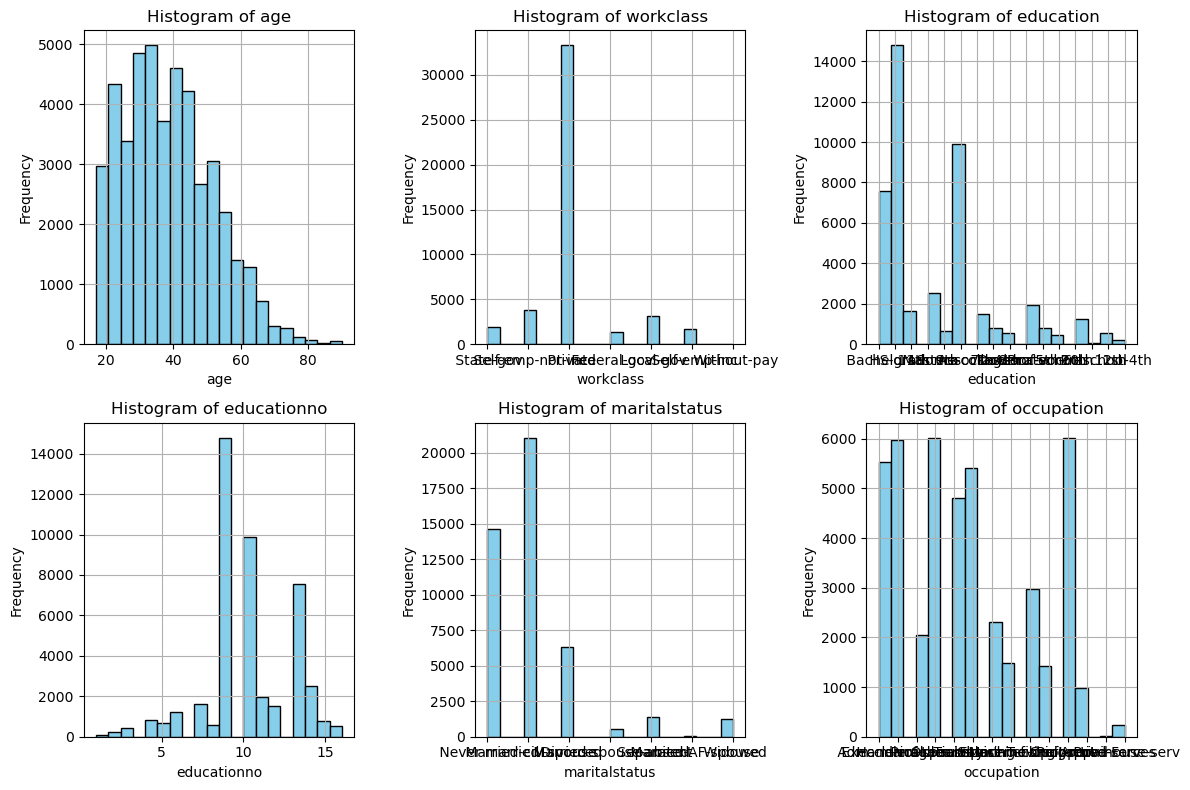

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# List of numerical columns to explore
numerical_columns = ['age','workclass','education','educationno','maritalstatus','occupation']

# Plot histograms for each numerical column
plt.figure(figsize=(12, 8))

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2, i)
    plt.hist(data[column_name].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Box-Plot

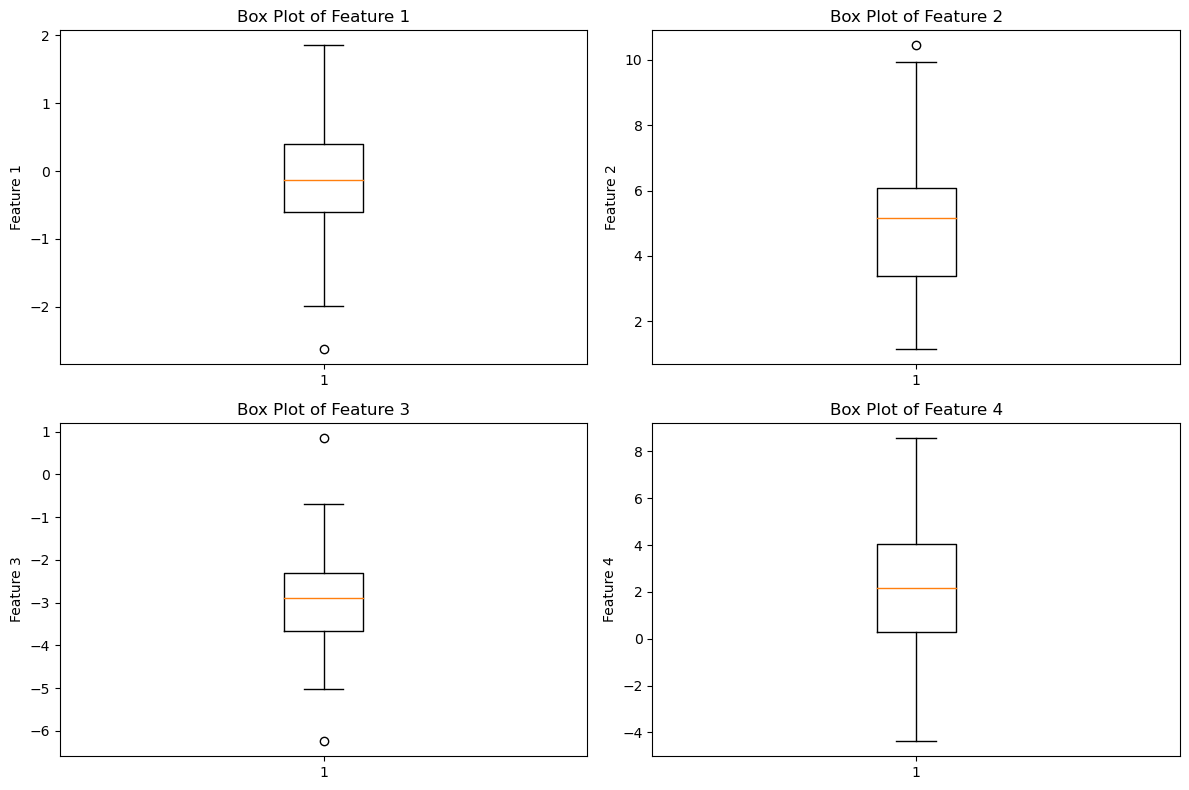

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# List of numerical columns to explore
numerical_columns = ['age','workclass','education','educationno','maritalstatus','occupation']

# Generating a more complex dataset
np.random.seed(42)
data = pd.DataFrame({
    'Feature 1': np.random.normal(0, 1, 100),
    'Feature 2': np.random.normal(5, 2, 100),
    'Feature 3': np.random.normal(-3, 1, 100),
    'Feature 4': np.random.normal(2, 3, 100)
})

numerical_columns = data.columns

plt.figure(figsize=(12, 8))

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2, i)
    plt.boxplot(data[column_name].dropna())
    plt.title('Box Plot of {}'.format(column_name))
    plt.ylabel(column_name)

plt.tight_layout()
plt.show()


### Relationships between features and survival using scatter plots and bar plots.

#### 1. Scatter Plots

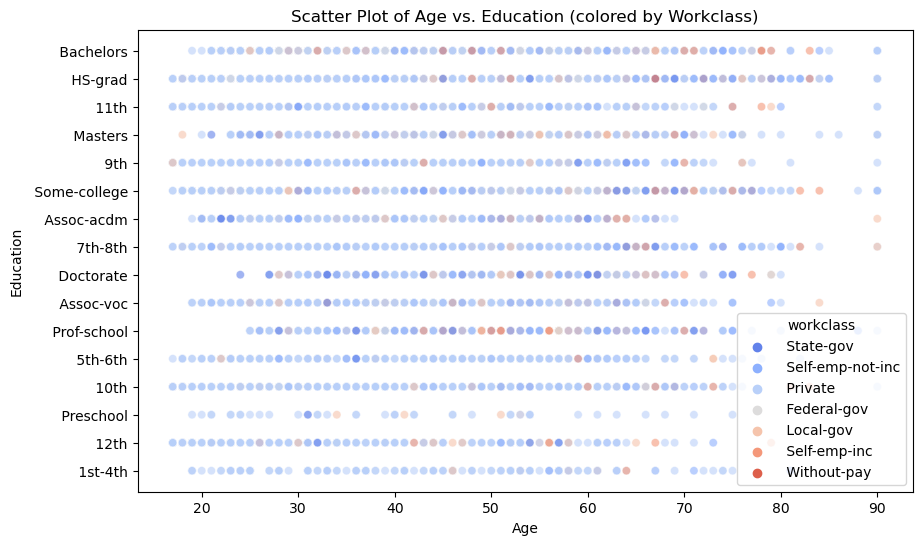

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Scatter plot of Age vs. Education colored by Workclass
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_train, x='age', y='education', hue='workclass', palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot of Age vs. Education (colored by Workclass)')
plt.xlabel('Age')
plt.ylabel('Education')
plt.show()



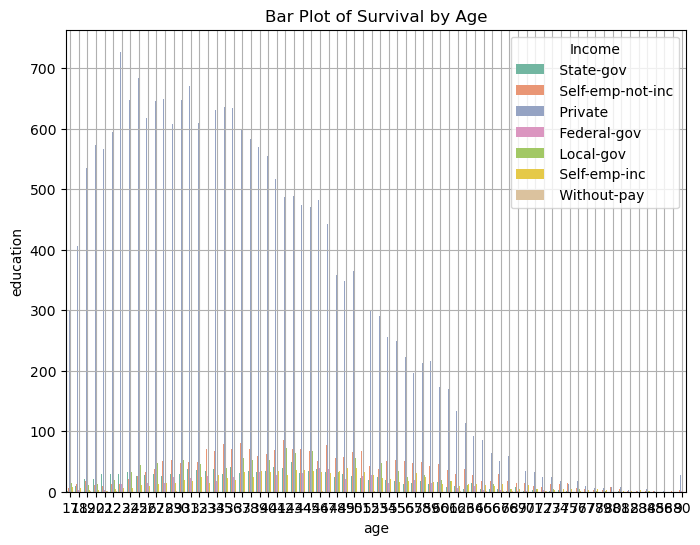

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Bar plot of Survival by Age
plt.figure(figsize=(8, 6))
sns.countplot(data=salary_train, x='age', hue='workclass', palette='Set2')
plt.title('Bar Plot of Survival by Age')
plt.xlabel('age')
plt.ylabel('education')
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()



# Visualizations Technique

# Decision Boundaries
#### Visualizing the decision boundaries of Naive Bayes classifiers in two-dimensional space can help understand how the model separates different classes.

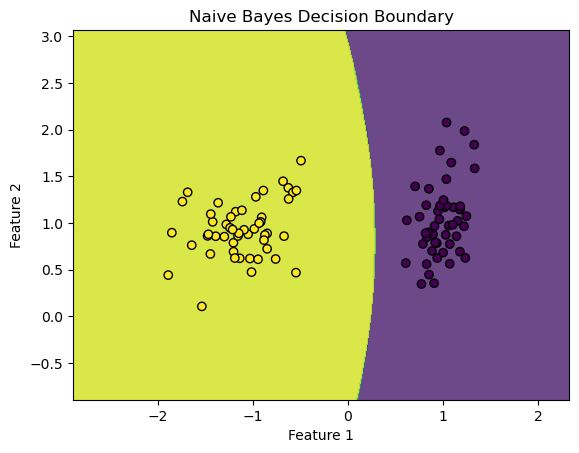

In [56]:
# Load the dataset
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Generate synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

# Fit Naive Bayes
model = GaussianNB()
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundary')
plt.show()


# Confusion Matrix
#### A confusion matrix shows the performance of the classification model by comparing the actual and predicted labels. It is particularly useful for assessing the model’s accuracy and identifying misclassified instances.

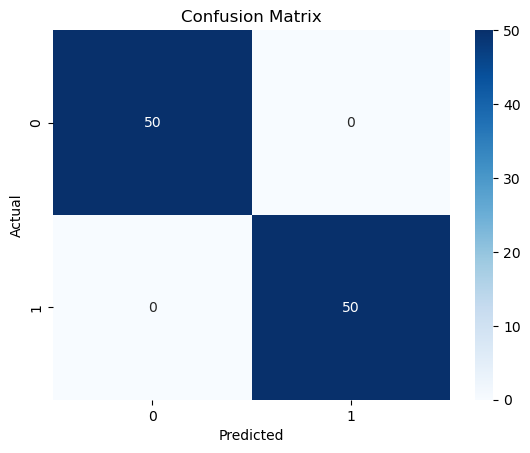

In [57]:
# Load the dataset
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Predict on test data
y_pred = model.predict(X)

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature Importance
#### Although Naive Bayes does not directly provide feature importance scores like tree-based methods, you can still visualize the influence of features

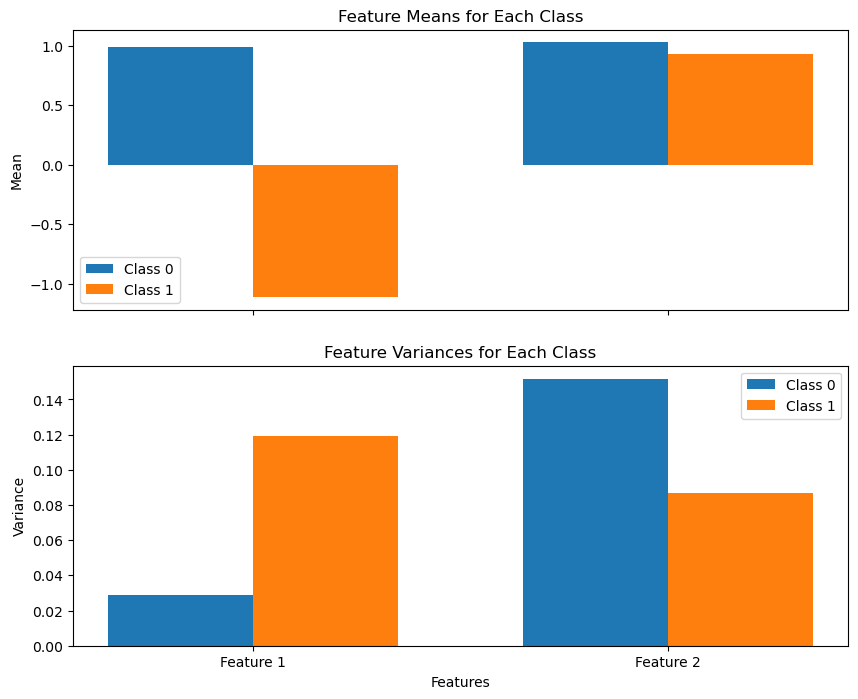

In [58]:
# Load the dataset
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Generate synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

# Fit Naive Bayes
model = GaussianNB()
model.fit(X, y)

# Get the mean and variance of each feature for each class
means = model.theta_
variances = model.var_
features = ['Feature 1', 'Feature 2']

# Plot mean and variance for each class
x = np.arange(len(features))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot means
for i in range(means.shape[0]):
    ax[0].bar(x + (i * width), means[i], width, label=f'Class {i}')
ax[0].set_ylabel('Mean')
ax[0].set_title('Feature Means for Each Class')
ax[0].legend()

# Plot variances
for i in range(variances.shape[0]):
    ax[1].bar(x + (i * width), variances[i], width, label=f'Class {i}')
ax[1].set_ylabel('Variance')
ax[1].set_title('Feature Variances for Each Class')
ax[1].set_xticks(x + width / 2)
ax[1].set_xticklabels(features)
ax[1].legend()

plt.xlabel('Features')
plt.show()


# Probability Distribution
#### Visualizing the probability distribution of features can provide insights into how the Naive Bayes classifier models the data.

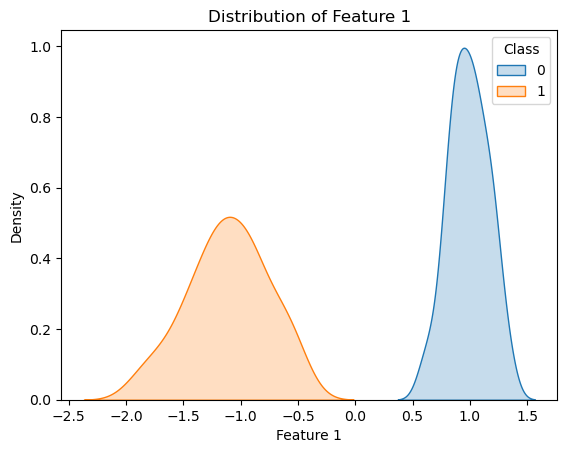

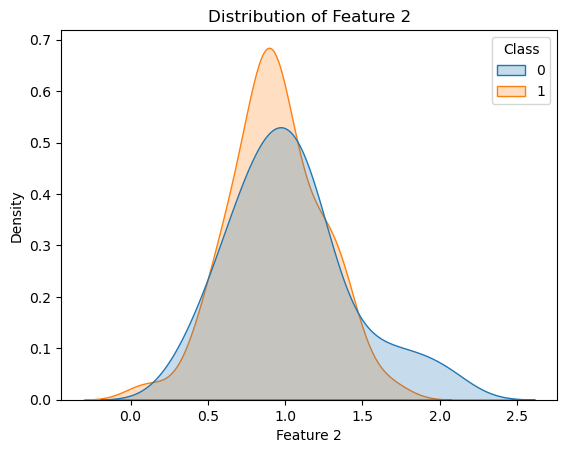

In [64]:
# Load the dataset
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=features)
df['Class'] = y

# Plot KDE
for feature in features:
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


# ROC Curve and AUC
#### For binary classification, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score can visualize the trade-off between the true positive rate and false positive rate.

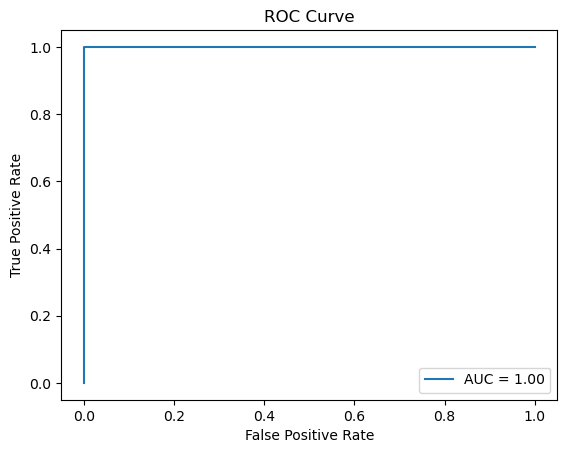

In [66]:
# Load the dataset
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
auc = roc_auc_score(y, model.predict_proba(X)[:, 1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Model Build

In [ ]:
colnames = salary_train.columns
len(colnames[0:13])
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX  = salary_test[colnames[0:13]]
testY  = salary_test[colnames[13]]

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix
sgnb = GaussianNB()
smnb = MultinomialNB()

# Multinomial naive Bayes

# Explanation 

#### > Data Loading: Load your training and test datasets.
#### > Combining Data: Combine the training and test datasets to ensure consistent preprocessing (one-hot encoding).
#### > Separating Features and Target: Separate the target column (Salary) before encoding the features.
#### > One-Hot Encoding: Convert categorical variables into dummy/indicator variables.
#### > Splitting Data: Split the combined data back into train and test sets based on the original sizes.

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


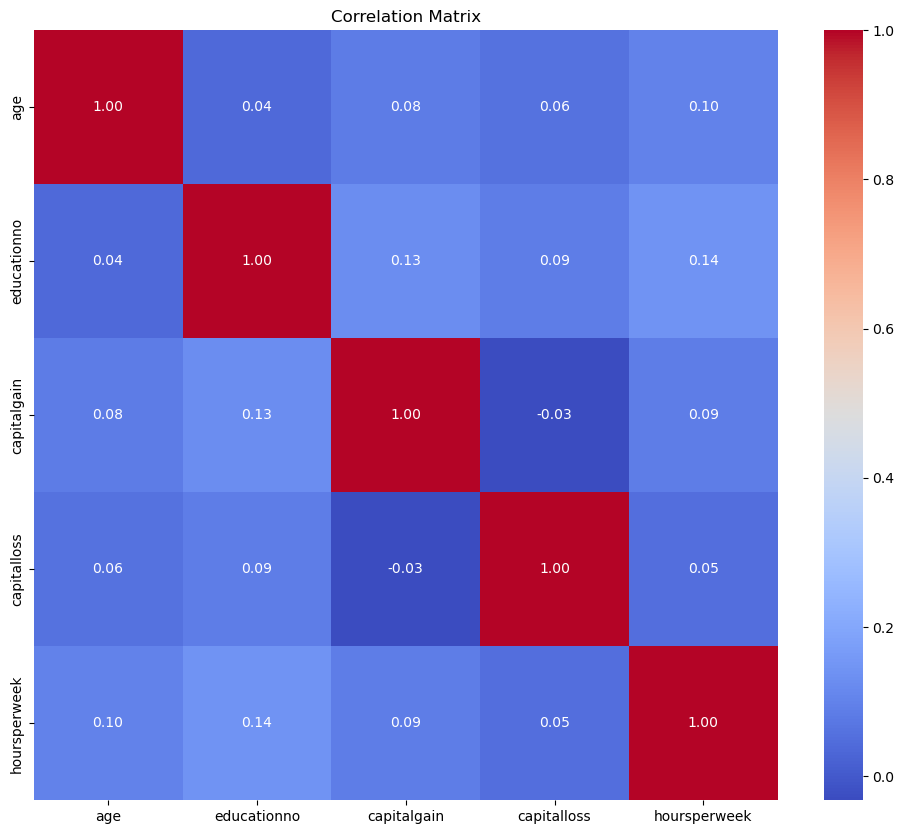

Gaussian Naive Bayes Performance Metrics:
Accuracy: 0.8267551133222775
Precision: 0.8337766471238682
Recall: 0.8267551133222775

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.87      0.88      6806
        >50K       0.64      0.70      0.67      2239

    accuracy                           0.83      9045
   macro avg       0.77      0.79      0.78      9045
weighted avg       0.83      0.83      0.83      9045



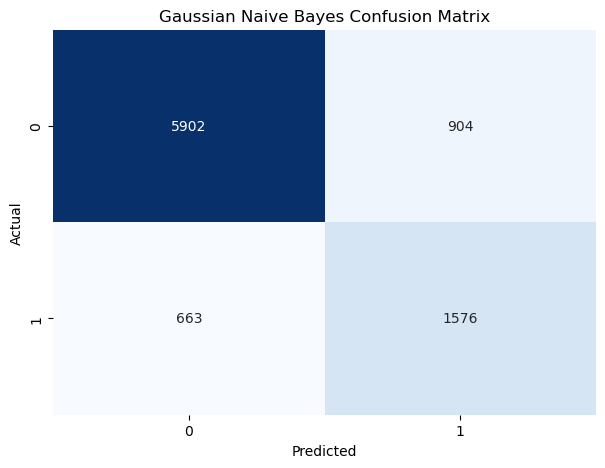

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Combine datasets for preprocessing (if necessary)
data = pd.concat([salary_train, salary_test], ignore_index=True)

# Print column names to identify the correct target column name
print(data.columns)

# Assuming 'X' contains features and 'y' contains the target variable
# The target column is 'Salary' based on the column names printed above
target_column = 'Salary'  # Correct target column name

X = data.drop(columns=[target_column])
y = data[target_column]

# Encode categorical variables if there are any
X = pd.get_dummies(X, drop_first=True)

# Split back into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure only numeric data for correlation matrix
numeric_X_train = X_train.select_dtypes(include=np.number)

# Visualize correlation matrix
corr = numeric_X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Initialize and train Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict with Gaussian Naive Bayes model
nb_y_pred = nb_model.predict(X_test)

# Evaluate Gaussian Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred, average='weighted')
nb_recall = recall_score(y_test, nb_y_pred, average='weighted')

print("Gaussian Naive Bayes Performance Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("\nClassification Report:\n", classification_report(y_test, nb_y_pred))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 2. Gaussian Naive Bayes

## Explanation:

### > Data Loading: The dataset is loaded into a pandas DataFrame.
### > Data Splitting: The data is split into training and testing sets using train_test_split.
### > Correlation Matrix: Only numeric columns are used to compute and visualize the correlation matrix.
### > Model Training: A Gaussian Naive Bayes model is initialized and trained on the training data.
### > Model Prediction: Predictions are made on the test data using the trained model.
### > Model Evaluation: The model's performance is evaluated using accuracy, precision, recall, and a classification report. A confusion matrix is also generated and visualized.
### > Ensure that you replace 'dataset.csv' with the path to your dataset and 'target_column

In [47]:
# Load the dataset
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

# Combine train and test data for consistent preprocessing
data = pd.concat([salary_train, salary_test])

# Separate the features and target column before encoding
target_column = 'Salary'
y = data[target_column]
X = data.drop(columns=[target_column])

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the combined data back into train and test sets
train_size = salary_train.shape[0]
X_train = X.iloc[:train_size, :]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:, :]
y_test = y.iloc[train_size:]

# Initialize Multinomial Naive Bayes model
mnb = MultinomialNB()

# Fit the model on the training data and make predictions on the test data
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

# Calculate and print confusion matrix
confusion_matrix_mnb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_mnb)

# Calculate and print accuracy
accuracy_mnb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_mnb)

# Calculate and print classification report
report_mnb = classification_report(y_test, y_pred)
print("Classification Report:\n", report_mnb)

Confusion Matrix:
 [[10891   469]
 [ 2920   780]]
Accuracy: 0.7749667994687915
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



# 3. Bernoulli Naive Bayes

#### > Use Case: Suitable for binary/boolean features.
#### > Assumption: Features are binary (0 or 1), indicating the presence or absence of a feature.
#### > Model: Each feature is modeled using a Bernoulli distribution.


In [67]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic binary dataset
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Binarize the features to make them suitable for BernoulliNB
X = np.where(X > np.mean(X, axis=0), 1, 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bernoulli Naive Bayes classifier
model = BernoulliNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       148
           1       0.93      0.91      0.92       152

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# 4. Complement Naive Bayes
#### > Use Case: An improvement over Multinomial Naive Bayes, especially useful for imbalanced datasets.
#### > Assumption: Similar to Multinomial Naive Bayes but corrects the imbalances by using statistics from the complement of each class.
#### > Model: Designed to handle imbalanced data by weighting the probabilities to reduce bias towards the majority class.

In [69]:
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=2, n_redundant=10, 
                           n_clusters_per_class=1, random_state=42)

# Scale features to be non-negative
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Complement Naive Bayes classifier
model = ComplementNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       157
           1       0.93      0.87      0.90       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# 5. Categorical Naive Bayes
#### > Use Case: Suitable for categorical data where features are nominal (not ordinal).
#### > Assumption: Each feature is categorical and the likelihood of each category is estimated using maximum likelihood.
#### > Model: Each feature is treated as a categorical variable and the probabilities are estimated directly from the data.

In [70]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic categorical dataset
def generate_categorical_data(n_samples, n_features, n_classes, n_categories_per_feature):
    X = np.random.randint(0, n_categories_per_feature, size=(n_samples, n_features))
    y = np.random.randint(0, n_classes, size=n_samples)
    return X, y

# Parameters
n_samples = 1000
n_features = 10
n_classes = 3
n_categories_per_feature = 4

# Create synthetic dataset
X, y = generate_categorical_data(n_samples, n_features, n_classes, n_categories_per_feature)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Categorical Naive Bayes classifier
model = CategoricalNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.32
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.55      0.43        97
           1       0.23      0.24      0.24        94
           2       0.40      0.19      0.26       109

    accuracy                           0.32       300
   macro avg       0.33      0.33      0.31       300
weighted avg       0.33      0.32      0.31       300

